# 기상자료개방포털
https://data.kma.go.kr/

1. 종관기상관측(ASOS)
2. 자료형태 - 일자료, 서울특별시 - 서울, 기온 - 평균기온, 날짜 2006 ~ 2016년 

In [2]:
import pandas as pd
df = pd.read_csv('tem10y.csv', encoding= 'utf-8')
df


,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
...,...,...,...,...,...,...
4013,2016,12,27,11.1,8,2
4014,2016,12,28,6.0,8,2
4015,2016,12,29,4.3,8,2
4016,2016,12,30,6.0,8,2


In [3]:
# 날짜별 기온을 리스트에 넣기

md = {} # md라는 배열 만들어 놓고 
for i,row in df.iterrows(): # 한줄한줄 읽어가면서 정보 넣어주기
    m,d,v = (int(row['월']),int(row['일']),float(row['기온']))
    key = str(m) + '/' + str(d)  # '1/1' (1월1일) 식으로 데이터 들어간다
    if not(key in md): md[key] = []
    md[key] += [v] # 1/1 6.0
            # 년도 별로 하고 싶으면 파일 자체를 년도 별로 나눠서 저장해라 10년치면 10개
    
# 날짜별 평균 구하기
avs = {}
for key in md :
    v = avs[key] =sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

In [7]:
avs["11/1"]

16.536363636363635

월
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 기온, dtype: float64


ValueError: Format 'pnp' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

C:\bigdata\anaconda3\envs\bigdata\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\bigdata\anaconda3\envs\bigdata\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 50900 missing from current font.
  font.load_char(ord(s), flags=flags)


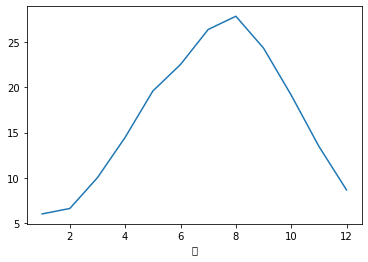

In [12]:
import matplotlib.pyplot as plt

g = df.groupby(['월'])["기온"]
g_avg = g.sum() / g.count()
# 월별 평균 구하기

print(g_avg)
g_avg.plot()
plt.savefig('10y-ㅡmonth-avg.pnp')
plt.show()

3652
366


<function matplotlib.pyplot.show(*args, **kw)>

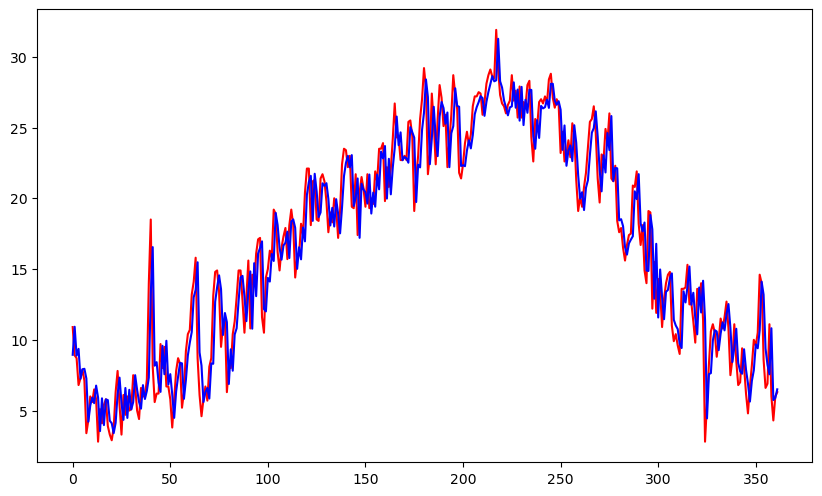

In [71]:
from sklearn.linear_model import LinearRegression
import numpy as np

train_year = (df["연"] <= 2015)
test_year = (df["연"] >=2016)

interval = 3 #인터벌 수정에따라 비교가 다르게 된다. 


def make_data(data):
    x = []
    y = []
    temps = list(data["기온"]) # 기온이라는 데이터 끌어온다.
    print(len(temps))   # 결과  : 3652, 366
    for i in range(len(temps)):
        if i <= interval : continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d =i + p - interval # i = 4   +  p = 0 -  interval = 3  --> 1 , 4 + 1 - 3 -> 2 , 4 + 2 - 3 -> 3
            xa.append(temps[d]) #temps[] 
        x.append(xa)
    return(x,y)
    
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])


# 학습하기
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) #학습하기
pre_y = lr.predict(test_x) # 예측하기


#결과를 그래프로 그리기

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('10y_lr.png')
plt.show


























